# For Charts you generally need to play around a bit more, so I've opted out for keeping them as notebooks

In [2]:
import plotly.express as px


In [3]:
import geopandas as gpd

In [4]:
gdf = gpd.read_file('../all_neighborhoods_block_analysis.geojson')



In [5]:

newname = "Absolute Perimeter Diff."

gdf['neighborhood'] = gdf['neighborhood'].str.replace(', Curitiba', '')

gdf.rename(columns={'perimeter_diff_abs': newname,'neighborhood':'Neighborhood'},inplace=True)

In [6]:
px.histogram(gdf, 
             x=newname, 
            #  y="tip", 
             color="Neighborhood",
                   marginal="box", # or violin, rug
                #    hover_data=df.columns
                # range_x=(0,30),
                width = 900,
                nbins=10,
                   )

In [7]:
px.box(gdf,             x=newname, 
            #  y="tip", 
             color="Neighborhood",
             height=200)

In [8]:
gdf[newname].values[gdf[newname].values > 7] = None


In [9]:
px.histogram(gdf, 
             x=newname, 
            #  y="tip", 
             color="Neighborhood",
                   marginal="box", # or violin, rug
                #    hover_data=df.columns
                # range_x=(0,30),
                width = 900,
                height=400,
                nbins=10,
                   )

In [10]:
gdf.columns

Index(['names', 'norm_p_a_ratio', 'contained_pol_sidewalks',
       'ratio_unary_sidewalk', 'ratio_reconstructed_sidewalk',
       'diff_norm_ratio', 'hausdorff_distance', 'frechet_distance',
       'hausd_fretch_diff', 'contained_pol_sidewalks_ids', 'area_diff',
       'area_diff_perc', 'Neighborhood', 'condition', 'perimeter_diff',
       'Absolute Perimeter Diff.', 'perimeter_diff_perc', 'geometry'],
      dtype='object')

In [11]:
# summarizing all types of blocks:

grouped = gdf.groupby(['Neighborhood', 'condition']).size().reset_index(name='Count')

In [12]:
grouped

,Neighborhood,condition,Count
0,Jardim das Américas,Closed,143
1,Jardim das Américas,Closed Multi,4
2,Jardim das Américas,Unclosed,12
3,Jardim das Américas,Without S.,31
4,Água Verde,Closed,249
5,Água Verde,Closed Multi,1
6,Água Verde,Unclosed,2
7,Água Verde,Without S.,26


In [13]:
pivot_table = grouped.pivot_table(index='Neighborhood', columns='condition', values='Count', aggfunc='sum', fill_value=0)

<AxesSubplot:xlabel='condition'>

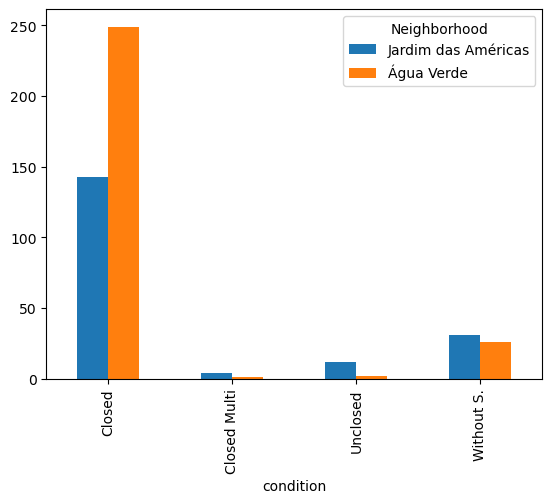

In [14]:
pivot_table.T.plot.bar()

In [15]:
px.histogram(gdf, 
             x='perimeter_diff_perc', 
            #  y="tip", 
             color="Neighborhood",
                   marginal="box", # or violin, rug
                #    hover_data=df.columns
                # range_x=(0,30),
                width = 900,
                nbins=10,
                   )

In [16]:
px.histogram(gdf, 
             x='norm_p_a_ratio', 
            #  y="tip", 
             color="Neighborhood",
                   marginal="box", # or violin, rug
                #    hover_data=df.columns
                # range_x=(0,30),
                width = 900,
                nbins=10,
                   )